# Imports

In [2]:
import pandas as pd
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import classification_report

# Information

Within this notebook, I show the overall analyses I have performed for the results section for the static system in my Master's thesis.

I start by showing the best f1-score and threshold as the starting point for the research shown here.
Afterwards, I move into the general distribution of the labels using the best threshold for *all* data.
I follow this up by the F1-scores of the *gold data subset* for each genre and an analysis is multiple patterns found within this subset of the data.

# General

## F1-score with Best threshold (Taken from Treshold testing)

### Human

In [9]:
thresholds = pd.read_csv('../results/context_thresholds.tsv', sep='\t', index_col=0)
display(thresholds.style.highlight_max(subset=['f1-score'], color = 'mediumseagreen', axis = 0))

,threshold,precision,recall,f1-score,support,t_metric
0,0.400000,0.582820,0.613158,0.543425,125,word-major-minor
1,0.400000,0.541667,0.557018,0.513889,125,sent-major-minor
2,0.400000,0.582820,0.613158,0.543425,125,basic
3,0.450000,0.586538,0.618421,0.550085,125,word-major-minor
4,0.450000,0.541408,0.556140,0.521412,125,sent-major-minor
5,0.450000,0.561633,0.584211,0.537651,125,basic
6,0.500000,0.590292,0.623684,0.556738,125,word-major-minor
7,0.500000,0.558847,0.576316,0.552773,125,sent-major-minor
8,0.500000,0.595390,0.626316,0.589086,125,basic
9,0.550000,0.581925,0.612281,0.552834,125,word-major-minor


In [10]:
print(thresholds.to_latex(float_format="%.2f").replace('_', ' '))

\begin{tabular}{lrrrrrl}
\toprule
 & threshold & precision & recall & f1-score & support & t metric \\
\midrule
0 & 0.40 & 0.58 & 0.61 & 0.54 & 125 & word-major-minor \\
1 & 0.40 & 0.54 & 0.56 & 0.51 & 125 & sent-major-minor \\
2 & 0.40 & 0.58 & 0.61 & 0.54 & 125 & basic \\
3 & 0.45 & 0.59 & 0.62 & 0.55 & 125 & word-major-minor \\
4 & 0.45 & 0.54 & 0.56 & 0.52 & 125 & sent-major-minor \\
5 & 0.45 & 0.56 & 0.58 & 0.54 & 125 & basic \\
6 & 0.50 & 0.59 & 0.62 & 0.56 & 125 & word-major-minor \\
7 & 0.50 & 0.56 & 0.58 & 0.55 & 125 & sent-major-minor \\
8 & 0.50 & 0.60 & 0.63 & 0.59 & 125 & basic \\
9 & 0.55 & 0.58 & 0.61 & 0.55 & 125 & word-major-minor \\
10 & 0.55 & 0.56 & 0.57 & 0.55 & 125 & sent-major-minor \\
11 & 0.55 & 0.60 & 0.62 & 0.60 & 125 & basic \\
12 & 0.60 & 0.55 & 0.57 & 0.53 & 125 & word-major-minor \\
13 & 0.60 & 0.57 & 0.59 & 0.57 & 125 & sent-major-minor \\
14 & 0.60 & 0.60 & 0.62 & 0.61 & 125 & basic \\
\bottomrule
\end{tabular}



In [11]:
best_report = pd.read_csv('../results/context_best_thres_report.tsv', sep='\t', index_col=0)
print('Classification report')
print(best_report.to_string().replace('NaN', '   ').replace('accuracy', '\naccuracy'))

Classification report
                precision    recall  f1-score  support
creative shift   0.388889  0.466667  0.424242     30.0
reproduction     0.820225  0.768421  0.793478     95.0

accuracy                             0.696000    125.0
macro avg        0.604557  0.617544  0.608860    125.0
weighted avg     0.716704  0.696000  0.704862    125.0


In [12]:
print(best_report.to_latex(float_format="%.2f").replace('NaN', '   ').replace('accuracy', '\\\\\naccuracy'))

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
creative shift & 0.39 & 0.47 & 0.42 & 30.00 \\
reproduction & 0.82 & 0.77 & 0.79 & 95.00 \\
\\
accuracy &     &     & 0.70 & 125.00 \\
macro avg & 0.60 & 0.62 & 0.61 & 125.00 \\
weighted avg & 0.72 & 0.70 & 0.70 & 125.00 \\
\bottomrule
\end{tabular}



### Machine

In [5]:
thresholds = pd.read_csv('../results/machine_context_thresholds.tsv', sep='\t', index_col=0)
display(thresholds.style.highlight_max(subset=['f1-score'], color = 'mediumseagreen', axis = 0))

,threshold,precision,recall,f1-score,support,t_metric
0,0.400000,0.597670,0.648213,0.561588,125,word-major-minor
1,0.400000,0.566821,0.600622,0.540076,125,sent-major-minor
2,0.400000,0.599303,0.632867,0.602398,125,basic
3,0.450000,0.601050,0.653263,0.568084,125,word-major-minor
4,0.450000,0.574026,0.610723,0.552560,125,sent-major-minor
5,0.450000,0.613492,0.638889,0.620522,125,basic
6,0.500000,0.607987,0.663364,0.581105,125,word-major-minor
7,0.500000,0.577726,0.615773,0.558824,125,sent-major-minor
8,0.500000,0.627173,0.630730,0.628867,125,basic
9,0.550000,0.595471,0.644134,0.569707,125,word-major-minor


In [13]:
print(thresholds.to_latex(float_format="%.2f").replace('_', ' '))

\begin{tabular}{lrrrrrl}
\toprule
 & threshold & precision & recall & f1-score & support & t metric \\
\midrule
0 & 0.40 & 0.58 & 0.61 & 0.54 & 125 & word-major-minor \\
1 & 0.40 & 0.54 & 0.56 & 0.51 & 125 & sent-major-minor \\
2 & 0.40 & 0.58 & 0.61 & 0.54 & 125 & basic \\
3 & 0.45 & 0.59 & 0.62 & 0.55 & 125 & word-major-minor \\
4 & 0.45 & 0.54 & 0.56 & 0.52 & 125 & sent-major-minor \\
5 & 0.45 & 0.56 & 0.58 & 0.54 & 125 & basic \\
6 & 0.50 & 0.59 & 0.62 & 0.56 & 125 & word-major-minor \\
7 & 0.50 & 0.56 & 0.58 & 0.55 & 125 & sent-major-minor \\
8 & 0.50 & 0.60 & 0.63 & 0.59 & 125 & basic \\
9 & 0.55 & 0.58 & 0.61 & 0.55 & 125 & word-major-minor \\
10 & 0.55 & 0.56 & 0.57 & 0.55 & 125 & sent-major-minor \\
11 & 0.55 & 0.60 & 0.62 & 0.60 & 125 & basic \\
12 & 0.60 & 0.55 & 0.57 & 0.53 & 125 & word-major-minor \\
13 & 0.60 & 0.57 & 0.59 & 0.57 & 125 & sent-major-minor \\
14 & 0.60 & 0.60 & 0.62 & 0.61 & 125 & basic \\
\bottomrule
\end{tabular}



In [14]:
best_report = pd.read_csv('../results/machine_context_best_thres_report.tsv', sep='\t', index_col=0)
print('Classification report')
print(best_report.to_string().replace('NaN', '   ').replace('accuracy', '\naccuracy'))

Classification report
                precision    recall  f1-score  support
creative shift   0.407407  0.423077  0.415094     26.0
reproduction     0.846939  0.838384  0.842640     99.0

accuracy                             0.752000    125.0
macro avg        0.627173  0.630730  0.628867    125.0
weighted avg     0.755516  0.752000  0.753710    125.0


In [15]:
print(best_report.to_latex(float_format="%.2f").replace('NaN', '   ').replace('accuracy', '\\\\\naccuracy'))

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
creative shift & 0.41 & 0.42 & 0.42 & 26.00 \\
reproduction & 0.85 & 0.84 & 0.84 & 99.00 \\
\\
accuracy &     &     & 0.75 & 125.00 \\
macro avg & 0.63 & 0.63 & 0.63 & 125.00 \\
weighted avg & 0.76 & 0.75 & 0.75 & 125.00 \\
\bottomrule
\end{tabular}



## Overview Graph showing human and machine data label distribution

In [3]:
data = pd.read_csv('../results/context_data.tsv', sep='\t', index_col=0)
data_mt = pd.read_csv('../results/machine_context_data.tsv', sep='\t', index_col=0)

# In case some duplicates were left in the data
data.drop_duplicates(inplace=True)
data_mt.drop_duplicates(inplace=True)

In [4]:
df_amount = defaultdict(list)
for genre in data.genre.unique():
    for key, value in data[data.genre == genre].labels.value_counts().to_dict().items():
        df_amount['Genre'].append(genre)
        df_amount['Repro/Shift'].append(key)
        df_amount['Number'].append(value)
df_amount = pd.DataFrame.from_dict(df_amount)

df_amount_mt = defaultdict(list)
for genre in data_mt.genre.unique():
    for key, value in data_mt[data_mt.genre == genre].labels.value_counts().to_dict().items():
        df_amount_mt['Genre'].append(genre)
        df_amount_mt['Repro/Shift'].append(key)
        df_amount_mt['Number'].append(value)
df_amount_mt = pd.DataFrame.from_dict(df_amount_mt)

In [5]:
df_amount.loc[2, 'Genre'] = 'children family'
df_amount.loc[3, 'Genre'] = 'children family'
df_amount_mt.loc[2, 'Genre'] = 'children family'
df_amount_mt.loc[3, 'Genre'] = 'children family'

In [6]:
display(df_amount, df_amount_mt)

,Genre,Repro/Shift,Number
0,Action,reproduction,47770
1,Action,creative shift,16715
2,children family,reproduction,56749
3,children family,creative shift,17339
4,Comedy,reproduction,74125
5,Comedy,creative shift,20868
6,Documentary,reproduction,82243
7,Documentary,creative shift,15559
8,Drama,reproduction,69561
9,Drama,creative shift,20042


,Genre,Repro/Shift,Number
0,Action,reproduction,68558
1,Action,creative shift,14550
2,children family,reproduction,80464
3,children family,creative shift,12695
4,Comedy,reproduction,103275
5,Comedy,creative shift,17603
6,Documentary,reproduction,105815
7,Documentary,creative shift,15156
8,Drama,reproduction,96897
9,Drama,creative shift,16118


In [7]:
display(df_amount.groupby(['Genre']).sum(), 
        df_amount_mt.groupby(['Genre']).sum())

,Repro/Shift,Number
Genre,,
Action,reproductioncreative shift,64485
Comedy,reproductioncreative shift,94993
Documentary,reproductioncreative shift,97802
Drama,reproductioncreative shift,89603
children family,reproductioncreative shift,74088


,Repro/Shift,Number
Genre,,
Action,reproductioncreative shift,83108
Comedy,reproductioncreative shift,120878
Documentary,reproductioncreative shift,120971
Drama,reproductioncreative shift,113015
children family,reproductioncreative shift,93159


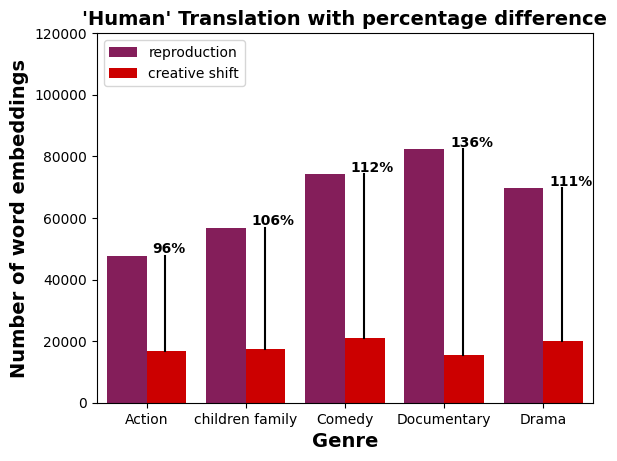

In [17]:

colors = ['#841e5a', '#cc0000']

t = sns.barplot(x = 'Genre', y = 'Number', hue = 'Repro/Shift', data = df_amount,
            # palette = 'hls',
            # palette = 'rocket',
            palette = colors,
            # order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            errorbar = 'sd'   
            )

start_loc = (0.19, .06)
# t_nor = lambda a : 1 / 63000 * a
t_nor = lambda a : 1 / 120000 * a
per_diff = lambda a, b, c=None : round(((a - b) / mean([a, b])) * 100, c)

for idx, g in enumerate(df_amount.Genre.unique()):
    try:
        line_min = df_amount[(df_amount.Genre == g) & (df_amount['Repro/Shift'] == 'creative shift')].Number.sum()
        line_max = df_amount[(df_amount.Genre == g) & (df_amount['Repro/Shift'] == 'reproduction')].Number.sum()
        t.axvline(start_loc[0]+(1*idx), t_nor(line_min), t_nor(line_max), color='black')
        t.text(start_loc[1]+(1*idx), line_max+1000, '{}%'.format(per_diff(line_max, line_min)), weight=600)
    except:
        print(line_min, line_max)
        print(idx, g)


t.set(ylim=(0, 120000))
t.legend(loc="upper left")
# sns.move_legend(t, "upper left", bbox_to_anchor=(1, 1))
plt.title('\'Human\' Translation with percentage difference', size=14, weight=600)
plt.xlabel('Genre', size=14, weight=600)
plt.ylabel('Number of word embeddings', size=14, weight=600)
plt.show()

In [18]:
t.figure.savefig('../results/figures/context_human_barplot.pdf', format='pdf', bbox_inches="tight")

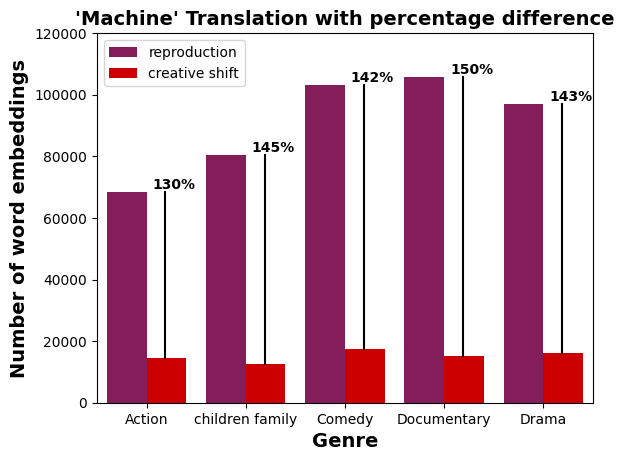

In [19]:
colors = ['#841e5a', '#cc0000']

t = sns.barplot(x = 'Genre', y = 'Number', hue = 'Repro/Shift', data = df_amount_mt,
            # palette = 'hls',
            # palette = 'rocket',
            palette = colors,
            # order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            errorbar = 'sd'   
            )

start_loc = (0.19, .06)
# t_nor = lambda a : 1 / 63000 * a
t_nor = lambda a : 1 / 120000 * a
per_diff = lambda a, b, c=None : round(((a - b) / mean([a, b])) * 100, c)

for idx, g in enumerate(df_amount.Genre.unique()):
    line_min = df_amount_mt[(df_amount_mt.Genre == g) & (df_amount_mt['Repro/Shift'] == 'creative shift')].Number.sum()
    line_max = df_amount_mt[(df_amount_mt.Genre == g) & (df_amount_mt['Repro/Shift'] == 'reproduction')].Number.sum()
    t.axvline(start_loc[0]+(1*idx), t_nor(line_min), t_nor(line_max), color='black')
    t.text(start_loc[1]+(1*idx), line_max+1000, '{}%'.format(per_diff(line_max, line_min)), weight=600)


t.set(ylim=(0, 120000))
t.legend(loc="upper left")
# sns.move_legend(t, "upper left", bbox_to_anchor=(1, 1))
plt.title('\'Machine\' Translation with percentage difference', size=14, weight=600)
plt.xlabel('Genre', size=14, weight=600)
plt.ylabel('Number of word embeddings', size=14, weight=600)
plt.show()

In [20]:
t.figure.savefig('../results/figures/context_machine_barplot.pdf', format='pdf', bbox_inches="tight")

# Genres

## Code

In [25]:
def tex_formatter(tex_str):
    tex_lst = tex_str.split('\n')
    tex_lst[2] = tex_lst[2].replace(r'&', r'& \bf').replace(r'_', r' ')
    tex_str = '\n'.join(tex_lst)
    print(tex_str)


In [26]:
def genre_prep(gold, genre):
    genre = gold[gold.genre == genre]
    print(classification_report(genre.human_label, genre.labels))
    print('')
    
    action_thres = pd.DataFrame(classification_report(genre.human_label, genre.labels, output_dict=True)).T
    action_thres.loc['accuracy', 'precision'] = None
    action_thres.loc['accuracy', 'recall'] = None
    action_thres.loc['accuracy', 'support'] = action_thres.loc['macro avg', 'support']
    tex_str = action_thres.to_latex(float_format='%.2f').replace('NaN', '   ')
    tex_lst = tex_str.split('\n')
    tex_lst[2] = tex_lst[2].replace(r'&', r'& \bf')
    tex_str = '\n'.join(tex_lst)
    print(tex_str)
    return genre

## Human

In [46]:
gold = pd.read_csv('../results/context_best_thres_gold.tsv', sep='\t', index_col=0)

In [47]:
gold = gold[['genre', 'film', 'sent_idx', 'src_sent', 'tgt_sent', 'src', 'tgt', 'cosine_w', 'cosine_sent', 'human_label', 'labels']]
gold.genre = gold.genre.map(lambda x : x.lower())
gold.human_label = gold.human_label.map(lambda x : x.lower())
gold

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
0,action,AC01,0,The Inquisition has finally delivered Spain to...,"Andalusië , Spanje , 1492 De Inquisitie heeft ...",delivered,overgedragen,0.457493,0.332573,reproduction,reproduction
1,action,AC01,1,Sultan Muhammad and his people still hold out ...,Sultan Mohammed en zijn mensen zitten nog in G...,his,zijn,0.118527,0.063485,reproduction,reproduction
2,action,AC01,5,swear to honor our Order in the fight for free...,zweert gij trouw aan de Orde ?,swear,zweert,0.474395,0.534822,reproduction,reproduction
3,action,AC01,8,I swear .,Dat zweer ik .,I,Dat,0.316410,0.203802,creative shift,reproduction
4,action,AC01,37,Sit down . You 're making me nervous .,Ga zitten . U maakt me nerveus .,Sit,Ga,0.159237,0.134274,creative shift,reproduction
...,...,...,...,...,...,...,...,...,...,...,...
120,drama,DR02,331,Poor men fighting a rich man 's war .,Armen die vochten voor de rijken .,Poor,Armen,0.301984,0.352154,reproduction,reproduction
121,drama,DR02,335,"Point is , us old soldiers gotta live , right ?",Wij oud-soldaten moeten ook rondkomen .,gotta,moeten,0.612505,0.335632,reproduction,creative shift
122,drama,DR02,389,"No , no . No , this is worthless .",Hier heb je niks aan .,worthless,niks,0.879349,0.784428,creative shift,creative shift
123,drama,DR01,979,I gave Bubba 's mama Bubba 's share .,gaf ik Bubba's deel aan zijn mama .,share,deel,0.129550,0.157482,reproduction,reproduction


### Action

In [48]:
action = genre_prep(gold, 'action')

                precision    recall  f1-score   support

creative shift       0.33      0.29      0.31         7
  reproduction       0.74      0.78      0.76        18

      accuracy                           0.64        25
     macro avg       0.54      0.53      0.53        25
  weighted avg       0.62      0.64      0.63        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.33 & 0.29 & 0.31 & 7.00 \\
reproduction & 0.74 & 0.78 & 0.76 & 18.00 \\
accuracy &     &     & 0.64 & 25.00 \\
macro avg & 0.54 & 0.53 & 0.53 & 25.00 \\
weighted avg & 0.62 & 0.64 & 0.63 & 25.00 \\
\bottomrule
\end{tabular}



In [49]:
action.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
0,action,AC01,0,The Inquisition has finally delivered Spain to the Templars .,"Andalusië , Spanje , 1492 De Inquisitie heeft Spanje overgedragen aan de Tempeliers .",delivered,overgedragen,0.457493,0.332573,reproduction,reproduction
1,action,AC01,1,Sultan Muhammad and his people still hold out in Granada .,Sultan Mohammed en zijn mensen zitten nog in Granada .,his,zijn,0.118527,0.063485,reproduction,reproduction
2,action,AC01,5,swear to honor our Order in the fight for freedom ?,zweert gij trouw aan de Orde ?,swear,zweert,0.474395,0.534822,reproduction,reproduction
3,action,AC01,8,I swear .,Dat zweer ik .,I,Dat,0.316410,0.203802,creative shift,reproduction
4,action,AC01,37,Sit down . You 're making me nervous .,Ga zitten . U maakt me nerveus .,Sit,Ga,0.159237,0.134274,creative shift,reproduction
5,action,AC01,268,Who are you ?,Wie ben jij ?,are,ben,0.100883,0.073212,creative shift,reproduction
6,action,AC10,31,You look great . You look okay .,Je ziet er top uit . Jij wel oké .,look,ziet,0.122729,0.137822,creative shift,reproduction
7,action,AC02,15,"Relax . Relax ! Mike . Bus , bus , bus .",Relax . Een bus .,Relax,Relax,0.071357,0.208366,reproduction,reproduction
8,action,AC02,68,to protect and serve our fair city .,om onze mooie stad veilig te houden .,fair,mooie,0.730707,0.293104,reproduction,creative shift
9,action,AC02,64,He dies last .,Hij moet als laatste sterven .,dies,moet,0.712526,0.219077,reproduction,creative shift


In [50]:
pd.options.mode.chained_assignment = None
display(action[action.labels != action.human_label].drop(columns=['genre', 'sent_idx']))
action['human_label'] = action['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
action['labels'] = action['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(action[action.labels != action.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
3,AC01,I swear .,Dat zweer ik .,I,Dat,0.316410,0.203802,creative shift,reproduction
4,AC01,Sit down . You 're making me nervous .,Ga zitten . U maakt me nerveus .,Sit,Ga,0.159237,0.134274,creative shift,reproduction
5,AC01,Who are you ?,Wie ben jij ?,are,ben,0.100883,0.073212,creative shift,reproduction
6,AC10,You look great . You look okay .,Je ziet er top uit . Jij wel oké .,look,ziet,0.122729,0.137822,creative shift,reproduction
8,AC02,to protect and serve our fair city .,om onze mooie stad veilig te houden .,fair,mooie,0.730707,0.293104,reproduction,creative shift
9,AC02,He dies last .,Hij moet als laatste sterven .,dies,moet,0.712526,0.219077,reproduction,creative shift
14,AC03,a bounty hunter deals in corpses .,Premiejagers krijgen geld voor lijken .,corpses,lijken,0.903604,0.659891,reproduction,creative shift
19,AC04,Where 's the kid ? In hiding . About halfway a...,Waar is de jongen ? Verstopt . Ongeveer halver...,across,halverwege,0.077683,0.149485,creative shift,reproduction
22,AC05,I 've heard this bedtime story before .,Dat verhaaltje heb ik eerder gehoord .,before,eerder,0.725745,0.258034,reproduction,creative shift


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
3 & AC01 & I swear . & Dat zweer ik . & 0.316 & 0.204 & CS & R \\
4 & AC01 & Sit down . You 're making me nervous . & Ga zitten . U maakt me nerveus . & 0.159 & 0.134 & CS & R \\
5 & AC01 & Who are you ? & Wie ben jij ? & 0.101 & 0.073 & CS & R \\
6 & AC10 & You look great . You look okay . & Je ziet er top uit . Jij wel oké . & 0.123 & 0.138 & CS & R \\
8 & AC02 & to protect and serve our fair city . & om onze mooie stad veilig te houden . & 0.731 & 0.293 & R & CS \\
9 & AC02 & He dies last . & Hij moet als laatste sterven . & 0.713 & 0.219 & R & CS \\
14 & AC03 & a bounty hunter deals in corpses . & Premiejagers krijgen geld voor lijken . & 0.904 & 0.660 & R & CS \\
19 & AC04 & Where 's the kid ? In hiding . About halfway across the bridge . I 'm trying to clear a path . & Waar is de jongen ? Verstopt . Ongeveer halverwege de brug . 

### Children Family

In [51]:
children_family = genre_prep(gold, 'children_family')

                precision    recall  f1-score   support

creative shift       0.33      0.50      0.40         6
  reproduction       0.81      0.68      0.74        19

      accuracy                           0.64        25
     macro avg       0.57      0.59      0.57        25
  weighted avg       0.70      0.64      0.66        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.33 & 0.50 & 0.40 & 6.00 \\
reproduction & 0.81 & 0.68 & 0.74 & 19.00 \\
accuracy &     &     & 0.64 & 25.00 \\
macro avg & 0.57 & 0.59 & 0.57 & 25.00 \\
weighted avg & 0.70 & 0.64 & 0.66 & 25.00 \\
\bottomrule
\end{tabular}



In [52]:
children_family.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
25,children_family,CH04,262,And yet it took our mother 's disappearance to bring you home .,Toch moest moeder verdwijnen voordat je terugkwam .,And,Toch,0.441500,0.283504,creative shift,reproduction
26,children_family,CH04,483,A shilling apiece !,Shilling per stuk .,shilling,Shilling,0.449264,0.444569,reproduction,reproduction
27,children_family,CH04,486,People are a lot more excitable than in the country .,Mensen zijn prikkelbaarder dan op het platteland .,excitable,prikkelbaarder,0.387751,0.262833,reproduction,reproduction
28,children_family,CH04,483,A shilling apiece !,Shilling per stuk .,apiece,per,0.634600,0.444569,reproduction,creative shift
29,children_family,CH04,487,"Without this reform , this country is n't ours , it 's theirs .","Zonder deze hervorming is dit land niet van ons , maar van hen .",ours,van,0.186594,0.095493,reproduction,reproduction
30,children_family,CH01,0,"Okay , here we go . I think it 's all set .",Volgens mij moet hij het zo doen .,it,het,0.715842,0.751890,reproduction,creative shift
31,children_family,CH04,500,that England 's suddenly consumed by this ridiculous marquess .,dat heel Engeland nu bezeten is van die belachelijke markies .,consumed,bezeten,0.639240,0.214958,reproduction,creative shift
32,children_family,CH04,513,You never cared about her before . She 's only 16 .,Je hebt nooit om haar gegeven . Ze is 16 .,before,gegeven,0.697850,0.235526,creative shift,creative shift
33,children_family,CH02,333,You should 've seen how fast she ditched me for those stupid Mayan ruins .,Ze ging wel erg graag naar die stomme Maya-ruïnes .,stupid,stomme,0.616206,0.476332,reproduction,creative shift
34,children_family,CH01,18,"All right , wave to Mom . Say "" Hi , Mom . "" Hi , Mom !","Zwaai eens naar mama . Hoi , mama .",to,naar,0.387064,0.239233,reproduction,reproduction


In [53]:
pd.options.mode.chained_assignment = None
display(children_family[children_family.labels != children_family.human_label].drop(columns=['genre', 'sent_idx']))
children_family['human_label'] = children_family['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
children_family['labels'] = children_family['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(children_family[children_family.labels != children_family.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
25,CH04,And yet it took our mother 's disappearance to...,Toch moest moeder verdwijnen voordat je terugk...,And,Toch,0.441500,0.283504,creative shift,reproduction
28,CH04,A shilling apiece !,Shilling per stuk .,apiece,per,0.634600,0.444569,reproduction,creative shift
30,CH01,"Okay , here we go . I think it 's all set .",Volgens mij moet hij het zo doen .,it,het,0.715842,0.751890,reproduction,creative shift
31,CH04,that England 's suddenly consumed by this ridi...,dat heel Engeland nu bezeten is van die belach...,consumed,bezeten,0.639240,0.214958,reproduction,creative shift
33,CH02,You should 've seen how fast she ditched me fo...,Ze ging wel erg graag naar die stomme Maya-ruï...,stupid,stomme,0.616206,0.476332,reproduction,creative shift
37,CH04,Afternoon .,Goedemiddag .,Afternoon,Goedemiddag,0.593859,0.365622,creative shift,reproduction
38,CH01,"I mean , technically , that 's illegal , too ....",Dat is ook verboden . Dat is waar .,too,ook,0.680769,0.369447,reproduction,creative shift
42,CH04,"Then after lunch , I 'd focus on fitness",Na de lunch conditietraining .,fitness,conditietraining,0.618723,0.399990,reproduction,creative shift
49,CH04,His favorite composer ? Paganini .,Favoriete componist ? Paganini .,His,Favoriete,0.508864,0.173250,creative shift,reproduction


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
25 & CH04 & And yet it took our mother 's disappearance to bring you home . & Toch moest moeder verdwijnen voordat je terugkwam . & 0.442 & 0.284 & CS & R \\
28 & CH04 & A shilling apiece ! & Shilling per stuk . & 0.635 & 0.445 & R & CS \\
30 & CH01 & Okay , here we go . I think it 's all set . & Volgens mij moet hij het zo doen . & 0.716 & 0.752 & R & CS \\
31 & CH04 & that England 's suddenly consumed by this ridiculous marquess . & dat heel Engeland nu bezeten is van die belachelijke markies . & 0.639 & 0.215 & R & CS \\
33 & CH02 & You should 've seen how fast she ditched me for those stupid Mayan ruins . & Ze ging wel erg graag naar die stomme Maya-ruïnes . & 0.616 & 0.476 & R & CS \\
37 & CH04 & Afternoon . & Goedemiddag . & 0.594 & 0.366 & CS & R \\
38 & CH01 & I mean , technically , that 's illegal , too . Fair point . & Dat is

### Comedy

In [54]:
comedy = genre_prep(gold, 'comedy')

                precision    recall  f1-score   support

creative shift       0.38      0.43      0.40         7
  reproduction       0.76      0.72      0.74        18

      accuracy                           0.64        25
     macro avg       0.57      0.58      0.57        25
  weighted avg       0.66      0.64      0.65        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.38 & 0.43 & 0.40 & 7.00 \\
reproduction & 0.76 & 0.72 & 0.74 & 18.00 \\
accuracy &     &     & 0.64 & 25.00 \\
macro avg & 0.57 & 0.58 & 0.57 & 25.00 \\
weighted avg & 0.66 & 0.64 & 0.65 & 25.00 \\
\bottomrule
\end{tabular}



In [55]:
comedy.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
50,comedy,CO01,199,Excuse me .,Pardon .,Excuse,Pardon,0.133563,0.084245,reproduction,reproduction
51,comedy,CO10,602,"Yeah , you 're good . It 's okay . That 's okay .",Niks aan de hand . Helemaal niks aan de hand .,okay,hand,0.835212,0.773393,creative shift,creative shift
52,comedy,CO04,1051,"Well , looks like I have company .",Ik heb gezelschap .,company,gezelschap,0.461867,0.440476,reproduction,reproduction
53,comedy,CO09,12,summon one of the managers . Sure .,roep ik een van de managers .,summon,roep,0.508869,0.299066,reproduction,reproduction
54,comedy,CO04,208,"Think you 've been watching too many scary movies , Louise .","Je hebt te veel enge films gekeken , Louise .",been,hebt,0.151328,0.136042,creative shift,reproduction
55,comedy,CO01,190,You expect me to find a guy named Manny in a town that I 've never been before ?,Ik moet ene Manny vinden in een voor mij onbekend stadje ?,You,Ik,0.527205,0.213580,creative shift,reproduction
56,comedy,CO09,14,"I do n't know what you been smoking , but you better back off my wife , or I 'm gonna punch a hole in your face .",Ik weet niet wat jij hebt genomen maar blijf weg van mijn vrouw of ik sla je in elkaar .,punch,sla,0.648548,0.342969,reproduction,creative shift
57,comedy,CO01,365,His axe is stuck in a stump .,Zijn bijl zit vast in een boomstronk .,His,Zijn,0.146521,0.318534,reproduction,reproduction
58,comedy,CO09,30,You know what the best part is ? You passed the test .,En weet je wat het beste was ? Je bent geslaagd .,passed,geslaagd,0.514035,0.385664,reproduction,reproduction
59,comedy,CO07,452,"Yes , I , am actually","Ja , ik was net",Yes,Ja,0.137677,0.241135,reproduction,reproduction


In [56]:
pd.options.mode.chained_assignment = None
display(comedy[comedy.labels != comedy.human_label].drop(columns=['genre', 'sent_idx']))
comedy['human_label'] = comedy['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
comedy['labels'] = comedy['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(comedy[comedy.labels != comedy.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
54,CO04,Think you 've been watching too many scary mov...,"Je hebt te veel enge films gekeken , Louise .",been,hebt,0.151328,0.136042,creative shift,reproduction
55,CO01,You expect me to find a guy named Manny in a t...,Ik moet ene Manny vinden in een voor mij onbek...,You,Ik,0.527205,0.213580,creative shift,reproduction
56,CO09,"I do n't know what you been smoking , but you ...",Ik weet niet wat jij hebt genomen maar blijf w...,punch,sla,0.648548,0.342969,reproduction,creative shift
60,CO09,"Timothy , I would like to present you with the...",Timothy ? Ik overhandig je de eerste indruk ro...,rose,roos,0.609020,0.225185,reproduction,creative shift
61,CO01,I I 'm kidding .,Grapje .,kidding,Grapje,0.916915,0.851082,reproduction,creative shift
62,CO03,"remember falling off the couch ,",weet nog dat ik van de bank viel .,couch,bank,0.786819,0.582850,reproduction,creative shift
66,CO08,to pick where I wanna go to school .,om te kiezen waar ik wil studeren .,school,studeren,0.418748,0.238738,creative shift,reproduction
71,CO09,Why are you ordering Grubhub seven days a week...,Waarom bestel je elke dag Grubhub ? Omdat ik h...,a,elke,0.426168,0.217844,creative shift,reproduction
74,CO09,Fuck .,Kut .,Fuck,Kut,0.723787,0.436759,reproduction,creative shift


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
54 & CO04 & Think you 've been watching too many scary movies , Louise . & Je hebt te veel enge films gekeken , Louise . & 0.151 & 0.136 & CS & R \\
55 & CO01 & You expect me to find a guy named Manny in a town that I 've never been before ? & Ik moet ene Manny vinden in een voor mij onbekend stadje ? & 0.527 & 0.214 & CS & R \\
56 & CO09 & I do n't know what you been smoking , but you better back off my wife , or I 'm gonna punch a hole in your face . & Ik weet niet wat jij hebt genomen maar blijf weg van mijn vrouw of ik sla je in elkaar . & 0.649 & 0.343 & R & CS \\
60 & CO09 & Timothy , I would like to present you with the first impression rose . & Timothy ? Ik overhandig je de eerste indruk roos . & 0.609 & 0.225 & R & CS \\
61 & CO01 & I I 'm kidding . & Grapje . & 0.917 & 0.851 & R & CS \\
62 & CO03 & remember falling off the co

### Documentary

In [57]:
documentary = genre_prep(gold, 'documentary')

                precision    recall  f1-score   support

creative shift       0.40      0.50      0.44         4
  reproduction       0.90      0.86      0.88        21

      accuracy                           0.80        25
     macro avg       0.65      0.68      0.66        25
  weighted avg       0.82      0.80      0.81        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.40 & 0.50 & 0.44 & 4.00 \\
reproduction & 0.90 & 0.86 & 0.88 & 21.00 \\
accuracy &     &     & 0.80 & 25.00 \\
macro avg & 0.65 & 0.68 & 0.66 & 25.00 \\
weighted avg & 0.82 & 0.80 & 0.81 & 25.00 \\
\bottomrule
\end{tabular}



In [58]:
documentary.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
75,documentary,DO01,895,to say that it 's gonna be right on crime . That it 's gonna be on the right side of criminal justice policy and reform .,door te zeggen dat ze aan de juiste kant van de wet staan .,right,juiste,0.700810,0.523493,reproduction,creative shift
76,documentary,DO06,20,"one of my first memories of country music was when I was six years old , and my parents took me to see LeAnn Rimes in concert .",Een van mijn eerste herinneringen aan country was toen ik zes was en mijn ouders me meenamen naar LeAnn Rimes .,took,meenamen,0.545826,0.157902,reproduction,reproduction
77,documentary,DO07,53,"Hey , Rick . You 're pretty busy these days , huh ?","Hoi , Rick . Je hebt het druk tegenwoordig .",Hey,Hoi,0.172566,0.134525,reproduction,reproduction
78,documentary,DO06,30,"I had that praise of , "" Taylor , you 're doing a good job at your work . ""","Ze prezen me . ' Taylor , je doet je werk goed . '",praise,prezen,0.633801,0.139516,reproduction,creative shift
79,documentary,DO06,37,I was so fulfilled by approval,Goedkeuring gaf me zo veel voldoening,fulfilled,Goedkeuring,0.386644,0.189482,reproduction,reproduction
80,documentary,DO06,39,I became the person who everyone wanted me to be .,Ik werd de persoon zoals iedereen me wilde zien .,who,zoals,0.386138,0.231521,creative shift,reproduction
81,documentary,DO10,306,Sure . Sure .,Natuurlijk .,Sure,Natuurlijk,0.195274,0.105951,reproduction,reproduction
82,documentary,DO06,55,I just need to make a better record .,Ik moet een betere plaat maken .,record,plaat,0.832512,0.368998,reproduction,creative shift
83,documentary,DO01,189,"If there is one area where the word "" war "" is appropriate , it is in the fight against crime .",Het woord ' oorlog ' hoort thuis in de strijd tegen criminaliteit .,is,hoort,0.688426,0.290655,creative shift,creative shift
84,documentary,DO09,388,"Mind you , the the population of San Francisco was only",De bevolking van San Francisco was maar,population,bevolking,0.056527,0.087978,reproduction,reproduction


In [59]:
pd.options.mode.chained_assignment = None
display(documentary[documentary.labels != documentary.human_label].drop(columns=['genre', 'sent_idx']))
documentary['human_label'] = documentary['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
documentary['labels'] = documentary['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(documentary[documentary.labels != documentary.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
75,DO01,to say that it 's gonna be right on crime . Th...,door te zeggen dat ze aan de juiste kant van d...,right,juiste,0.700810,0.523493,reproduction,creative shift
78,DO06,"I had that praise of , "" Taylor , you 're doin...","Ze prezen me . ' Taylor , je doet je werk goed...",praise,prezen,0.633801,0.139516,reproduction,creative shift
80,DO06,I became the person who everyone wanted me to ...,Ik werd de persoon zoals iedereen me wilde zien .,who,zoals,0.386138,0.231521,creative shift,reproduction
82,DO06,I just need to make a better record .,Ik moet een betere plaat maken .,record,plaat,0.832512,0.368998,reproduction,creative shift
93,DO01,There 's really no understanding of our Americ...,Je kunt onze Amerikaanse politieke cultuur nie...,There,Je,0.284367,0.060334,creative shift,reproduction


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
75 & DO01 & to say that it 's gonna be right on crime . That it 's gonna be on the right side of criminal justice policy and reform . & door te zeggen dat ze aan de juiste kant van de wet staan . & 0.701 & 0.523 & R & CS \\
78 & DO06 & I had that praise of , " Taylor , you 're doing a good job at your work . " & Ze prezen me . ' Taylor , je doet je werk goed . ' & 0.634 & 0.140 & R & CS \\
80 & DO06 & I became the person who everyone wanted me to be . & Ik werd de persoon zoals iedereen me wilde zien . & 0.386 & 0.232 & CS & R \\
82 & DO06 & I just need to make a better record . & Ik moet een betere plaat maken . & 0.833 & 0.369 & R & CS \\
93 & DO01 & There 's really no understanding of our American political culture & Je kunt onze Amerikaanse politieke cultuur niet begrijpen & 0.284 & 0.060 & CS & R \\
\bottomrule
\end{tabular}



### Drama

In [61]:
drama = genre_prep(gold, 'drama')

                precision    recall  f1-score   support

creative shift       0.50      0.67      0.57         6
  reproduction       0.88      0.79      0.83        19

      accuracy                           0.76        25
     macro avg       0.69      0.73      0.70        25
  weighted avg       0.79      0.76      0.77        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.50 & 0.67 & 0.57 & 6.00 \\
reproduction & 0.88 & 0.79 & 0.83 & 19.00 \\
accuracy &     &     & 0.76 & 25.00 \\
macro avg & 0.69 & 0.73 & 0.70 & 25.00 \\
weighted avg & 0.79 & 0.76 & 0.77 & 25.00 \\
\bottomrule
\end{tabular}



In [62]:
drama.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
100,drama,DR02,8,"And maybe , just for tonight , we can escape our troubles",Misschien kunnen we dan vanavond even onze zorgen vergeten,for,vanavond,0.322788,0.253630,creative shift,reproduction
101,drama,DR02,9,and hear of the great changes that are happening out there .,en horen welke grote veranderingen er plaatsvinden .,happening,plaatsvinden,0.338277,0.114704,reproduction,reproduction
102,drama,DR02,21,I 'm not gonna hurt you !,Ik doe je niks .,you,je,0.757343,0.519819,creative shift,creative shift
103,drama,DR02,23,Do n't bite !,Niet bijten .,bite,bijten,0.603205,0.353472,reproduction,creative shift
104,drama,DR02,41,"Where 'd you serve , Captain ?",Waar hebt u gediend ?,serve,gediend,0.469832,0.490172,reproduction,reproduction
105,drama,DR02,57,Dear Heaven .,Mijn hemel .,Dear,Mijn,0.653988,0.293971,creative shift,creative shift
106,drama,DR02,71,Pardon me . Lost child here .,Ik heb hier een zoekgeraakt kind .,Lost,zoekgeraakt,0.668693,0.483004,reproduction,creative shift
107,drama,DR03,1033,"Your wife , Martha , works at PacBell also , correct ?",Uw vrouw werkt toch ook bij PacBell ? Dat klopt .,works,werkt,0.129452,0.178670,reproduction,reproduction
108,drama,DR02,216,"And it 's a pleasure to make your acquaintance , make no mistake .",Leuk om kennis met je te maken .,pleasure,Leuk,0.413215,0.461302,reproduction,reproduction
109,drama,DR02,217,Mm . This is the bacon .,Dit is het spek .,bacon,spek,0.863360,0.645560,reproduction,creative shift


In [63]:
pd.options.mode.chained_assignment = None
display(drama[drama.labels != drama.human_label].drop(columns=['genre', 'sent_idx']))
drama['human_label'] = drama['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
drama['labels'] = drama['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(drama[drama.labels != drama.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
100,DR02,"And maybe , just for tonight , we can escape o...",Misschien kunnen we dan vanavond even onze zor...,for,vanavond,0.322788,0.253630,creative shift,reproduction
103,DR02,Do n't bite !,Niet bijten .,bite,bijten,0.603205,0.353472,reproduction,creative shift
106,DR02,Pardon me . Lost child here .,Ik heb hier een zoekgeraakt kind .,Lost,zoekgeraakt,0.668693,0.483004,reproduction,creative shift
109,DR02,Mm . This is the bacon .,Dit is het spek .,bacon,spek,0.863360,0.645560,reproduction,creative shift
112,DR02,"They paying you to take her home , or you doin...",Word je betaald om haar te brengen of ben je m...,They,Word,0.570951,0.361058,creative shift,reproduction
121,DR02,"Point is , us old soldiers gotta live , right ?",Wij oud-soldaten moeten ook rondkomen .,gotta,moeten,0.612505,0.335632,reproduction,creative shift


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
100 & DR02 & And maybe , just for tonight , we can escape our troubles & Misschien kunnen we dan vanavond even onze zorgen vergeten & 0.323 & 0.254 & CS & R \\
103 & DR02 & Do n't bite ! & Niet bijten . & 0.603 & 0.353 & R & CS \\
106 & DR02 & Pardon me . Lost child here . & Ik heb hier een zoekgeraakt kind . & 0.669 & 0.483 & R & CS \\
109 & DR02 & Mm . This is the bacon . & Dit is het spek . & 0.863 & 0.646 & R & CS \\
112 & DR02 & They paying you to take her home , or you doing it out of the goodness of your heart ? & Word je betaald om haar te brengen of ben je met haar begaan ? & 0.571 & 0.361 & CS & R \\
121 & DR02 & Point is , us old soldiers gotta live , right ? & Wij oud-soldaten moeten ook rondkomen . & 0.613 & 0.336 & R & CS \\
\bottomrule
\end{tabular}



## Machine

In [74]:
gold = pd.read_csv('../results/machine_context_best_thres_gold.tsv', sep='\t', index_col=0)

In [75]:
gold = gold[['genre', 'film', 'sent_idx', 'src_sent', 'tgt_sent', 'src', 'tgt', 'cosine_w', 'cosine_sent', 'human_label', 'labels']]
gold.genre = gold.genre.map(lambda x : x.lower())
gold.human_label = gold.human_label.map(lambda x : x.lower())
gold

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
0,action,AC01,0,The Inquisition has finally delivered Spain to...,De inquisitie heeft Spanje eindelijk uitgeleve...,delivered,uitgeleverd,0.251047,0.062565,reproduction,reproduction
1,action,AC01,1,Sultan Muhammad and his people still hold out ...,Sultan Mohammed en zijn volk houden nog stand ...,his,zijn,0.095121,0.050959,reproduction,reproduction
2,action,AC01,5,swear to honor our Order in the fight for free...,om onze Orde te eren in de strijd voor vrijheid ?,swear,om,0.659257,0.110100,creative shift,creative shift
3,action,AC01,8,I swear .,Dat zweer ik .,I,Dat,0.316410,0.203802,creative shift,reproduction
4,action,AC01,38,Sit down . You 're making me nervous .,Ga zitten . Je maakt me nerveus .,Sit,Ga,0.151804,0.128368,creative shift,reproduction
...,...,...,...,...,...,...,...,...,...,...,...
120,drama,DR02,391,Poor men fighting a rich man 's war .,Arme mannen vochten een rijke oorlog .,Poor,Arme,0.176537,0.073245,reproduction,reproduction
121,drama,DR02,395,"Point is , us old soldiers gotta live , right ?",Wij oude soldaten moeten leven .,gotta,moeten,0.215512,0.198202,reproduction,reproduction
122,drama,DR02,461,"No , no . No , this is worthless .","Nee , nee . Nee , dit is waardeloos .",worthless,waardeloos,0.099917,0.065806,reproduction,reproduction
123,drama,DR01,1303,I gave Bubba 's mama Bubba 's share .,gaf ik Bubba's moeder Bubba's deel .,share,deel,0.498643,0.075324,reproduction,reproduction


### Action

In [76]:
action = genre_prep(gold, 'action')

                precision    recall  f1-score   support

creative shift       0.40      0.33      0.36         6
  reproduction       0.80      0.84      0.82        19

      accuracy                           0.72        25
     macro avg       0.60      0.59      0.59        25
  weighted avg       0.70      0.72      0.71        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.40 & 0.33 & 0.36 & 6.00 \\
reproduction & 0.80 & 0.84 & 0.82 & 19.00 \\
accuracy &     &     & 0.72 & 25.00 \\
macro avg & 0.60 & 0.59 & 0.59 & 25.00 \\
weighted avg & 0.70 & 0.72 & 0.71 & 25.00 \\
\bottomrule
\end{tabular}



In [77]:
action.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
0,action,AC01,0,The Inquisition has finally delivered Spain to the Templars .,De inquisitie heeft Spanje eindelijk uitgeleverd aan de tempeliers .,delivered,uitgeleverd,0.251047,0.062565,reproduction,reproduction
1,action,AC01,1,Sultan Muhammad and his people still hold out in Granada .,Sultan Mohammed en zijn volk houden nog stand in Granada .,his,zijn,0.095121,0.050959,reproduction,reproduction
2,action,AC01,5,swear to honor our Order in the fight for freedom ?,om onze Orde te eren in de strijd voor vrijheid ?,swear,om,0.659257,0.110100,creative shift,creative shift
3,action,AC01,8,I swear .,Dat zweer ik .,I,Dat,0.316410,0.203802,creative shift,reproduction
4,action,AC01,38,Sit down . You 're making me nervous .,Ga zitten . Je maakt me nerveus .,Sit,Ga,0.151804,0.128368,creative shift,reproduction
5,action,AC01,297,Who are you ?,Wie bent u ?,are,bent,0.069775,0.046348,reproduction,reproduction
6,action,AC10,36,You look great . You look okay .,Je ziet er geweldig uit . Je ziet er goed uit .,look,ziet,0.073851,0.051454,reproduction,reproduction
7,action,AC02,20,"Relax . Relax ! Mike . Bus , bus , bus .","Relax . Relax ! Mike . Bus , bus , bus .",Relax,Relax,0.000000,0.000000,reproduction,reproduction
8,action,AC02,87,to protect and serve our fair city .,om onze mooie stad te beschermen en te dienen .,fair,mooie,0.722382,0.134197,reproduction,creative shift
9,action,AC02,82,He dies last .,Hij sterft als laatste .,dies,sterft,0.102491,0.079241,reproduction,reproduction


In [78]:
pd.options.mode.chained_assignment = None
display(action[action.labels != action.human_label].drop(columns=['genre', 'sent_idx']))
action['human_label'] = action['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
action['labels'] = action['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(action[action.labels != action.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
3,AC01,I swear .,Dat zweer ik .,I,Dat,0.316410,0.203802,creative shift,reproduction
4,AC01,Sit down . You 're making me nervous .,Ga zitten . Je maakt me nerveus .,Sit,Ga,0.151804,0.128368,creative shift,reproduction
8,AC02,to protect and serve our fair city .,om onze mooie stad te beschermen en te dienen .,fair,mooie,0.722382,0.134197,reproduction,creative shift
14,AC03,a bounty hunter deals in corpses .,een premiejager handelt in lijken .,corpses,lijken,0.926145,0.719458,reproduction,creative shift
18,AC04,near the market .,in de buurt van de markt .,near,in,0.264074,0.046424,creative shift,reproduction
19,AC04,You see the laundry across the street ?,Zie je de wasserij aan de overkant ?,across,aan,0.489664,0.227488,creative shift,reproduction
22,AC05,I 've heard this bedtime story before .,Ik heb dit verhaaltje voor het slapen gaan eer...,before,eerder,0.691515,0.089231,reproduction,creative shift


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
3 & AC01 & I swear . & Dat zweer ik . & 0.316 & 0.204 & CS & R \\
4 & AC01 & Sit down . You 're making me nervous . & Ga zitten . Je maakt me nerveus . & 0.152 & 0.128 & CS & R \\
8 & AC02 & to protect and serve our fair city . & om onze mooie stad te beschermen en te dienen . & 0.722 & 0.134 & R & CS \\
14 & AC03 & a bounty hunter deals in corpses . & een premiejager handelt in lijken . & 0.926 & 0.719 & R & CS \\
18 & AC04 & near the market . & in de buurt van de markt . & 0.264 & 0.046 & CS & R \\
19 & AC04 & You see the laundry across the street ? & Zie je de wasserij aan de overkant ? & 0.490 & 0.227 & CS & R \\
22 & AC05 & I 've heard this bedtime story before . & Ik heb dit verhaaltje voor het slapen gaan eerder gehoord . & 0.692 & 0.089 & R & CS \\
\bottomrule
\end{tabular}



### Children Family

In [79]:
children_family = genre_prep(gold, 'children_family')

                precision    recall  f1-score   support

creative shift       0.60      0.75      0.67         4
  reproduction       0.95      0.90      0.93        21

      accuracy                           0.88        25
     macro avg       0.77      0.83      0.80        25
  weighted avg       0.89      0.88      0.89        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.60 & 0.75 & 0.67 & 4.00 \\
reproduction & 0.95 & 0.90 & 0.93 & 21.00 \\
accuracy &     &     & 0.88 & 25.00 \\
macro avg & 0.77 & 0.83 & 0.80 & 25.00 \\
weighted avg & 0.89 & 0.88 & 0.89 & 25.00 \\
\bottomrule
\end{tabular}



In [80]:
children_family.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
25,children_family,CH04,301,And yet it took our mother 's disappearance to bring you home .,En toch was er de verdwijning van onze moeder voor nodig om je thuis te brengen .,And,En,0.113150,0.083205,reproduction,reproduction
26,children_family,CH04,556,A shilling apiece !,Een shilling per stuk !,shilling,shilling,0.056248,0.147223,reproduction,reproduction
27,children_family,CH04,559,People are a lot more excitable than in the country .,De mensen zijn veel prikkelbaarder dan op het platteland .,excitable,prikkelbaarder,0.365665,0.241642,reproduction,reproduction
28,children_family,CH04,556,A shilling apiece !,Een shilling per stuk !,apiece,per,0.610714,0.147223,reproduction,creative shift
29,children_family,CH04,561,"this country is n't ours , it 's theirs .","is dit land niet van ons , maar van hen .",ours,ons,0.292240,0.133055,reproduction,reproduction
30,children_family,CH01,0,"Okay , here we go . I think it 's all set .","Oké , daar gaan we . Ik denk dat alles klaar is .",it,alles,0.482203,0.260121,creative shift,reproduction
31,children_family,CH04,575,that England 's suddenly consumed by this ridiculous marquess .,dat Engeland plotseling wordt verteerd door deze belachelijke markies .,consumed,verteerd,0.580145,0.129140,creative shift,creative shift
32,children_family,CH04,590,You never cared about her before . She 's only 16 .,Je hebt nooit eerder om haar gegeven . Ze is pas 16 .,before,eerder,0.180047,0.232040,reproduction,reproduction
33,children_family,CH02,453,You should 've seen how fast she ditched me for those stupid Mayan ruins .,Je had moeten zien hoe snel ze me dumpte voor die stomme Maya-ruïnes .,stupid,stomme,0.523864,0.167620,reproduction,creative shift
34,children_family,CH01,19,"All right , wave to Mom . Say "" Hi , Mom . "" Hi , Mom !","Oké , zwaai naar mama . Zeg "" Hoi , Mam . "" Hoi , Mam !",to,naar,0.280655,0.111045,reproduction,reproduction


In [81]:
pd.options.mode.chained_assignment = None
display(children_family[children_family.labels != children_family.human_label].drop(columns=['genre', 'sent_idx']))
children_family['human_label'] = children_family['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
children_family['labels'] = children_family['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(children_family[children_family.labels != children_family.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
28,CH04,A shilling apiece !,Een shilling per stuk !,apiece,per,0.610714,0.147223,reproduction,creative shift
30,CH01,"Okay , here we go . I think it 's all set .","Oké , daar gaan we . Ik denk dat alles klaar is .",it,alles,0.482203,0.260121,creative shift,reproduction
33,CH02,You should 've seen how fast she ditched me fo...,Je had moeten zien hoe snel ze me dumpte voor ...,stupid,stomme,0.523864,0.167620,reproduction,creative shift


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
28 & CH04 & A shilling apiece ! & Een shilling per stuk ! & 0.611 & 0.147 & R & CS \\
30 & CH01 & Okay , here we go . I think it 's all set . & Oké , daar gaan we . Ik denk dat alles klaar is . & 0.482 & 0.260 & CS & R \\
33 & CH02 & You should 've seen how fast she ditched me for those stupid Mayan ruins . & Je had moeten zien hoe snel ze me dumpte voor die stomme Maya-ruïnes . & 0.524 & 0.168 & R & CS \\
\bottomrule
\end{tabular}



### Comedy

In [82]:
comedy = genre_prep(gold, 'comedy')

                precision    recall  f1-score   support

creative shift       0.57      0.50      0.53         8
  reproduction       0.78      0.82      0.80        17

      accuracy                           0.72        25
     macro avg       0.67      0.66      0.67        25
  weighted avg       0.71      0.72      0.71        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.57 & 0.50 & 0.53 & 8.00 \\
reproduction & 0.78 & 0.82 & 0.80 & 17.00 \\
accuracy &     &     & 0.72 & 25.00 \\
macro avg & 0.67 & 0.66 & 0.67 & 25.00 \\
weighted avg & 0.71 & 0.72 & 0.71 & 25.00 \\
\bottomrule
\end{tabular}



In [83]:
comedy.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
50,comedy,CO01,253,Excuse me .,Neem me niet kwalijk .,Excuse,Neem,0.296311,0.072281,creative shift,reproduction
51,comedy,CO10,785,"Yeah , you 're good . It 's okay . That 's okay .","Ja , het gaat goed . Het is goed . Zo is het goed .",okay,goed,0.264186,0.179476,reproduction,reproduction
52,comedy,CO04,1219,"Well , looks like I have company .","Nou , het lijkt erop dat ik gezelschap heb .",company,gezelschap,0.388121,0.171741,reproduction,reproduction
53,comedy,CO09,15,summon one of the managers . Sure .,een van de managers roepen . Tuurlijk .,summon,roepen,0.515817,0.165357,creative shift,creative shift
54,comedy,CO04,240,"Think you 've been watching too many scary movies , Louise .","Ik denk dat je te veel enge films hebt gekeken , Louise .",been,hebt,0.173400,0.131263,creative shift,reproduction
55,comedy,CO01,24,What ? You can get the contract signed this week .,Wat ? Je kunt het contract deze week laten tekenen .,You,Je,0.145491,0.064067,reproduction,reproduction
56,comedy,CO09,18,"but you better back off my wife , or I 'm gonna punch a hole in your face .","maar je kunt beter mijn vrouw met rust laten , of ik sla een gat in je gezicht .",punch,sla,0.429445,0.164997,reproduction,reproduction
57,comedy,CO01,463,His axe is stuck in a stump .,Zijn bijl zit vast in een stronk .,His,Zijn,0.138336,0.313748,reproduction,reproduction
58,comedy,CO09,36,You know what the best part is ? You passed the test .,Weet je wat het beste deel is ? Je bent geslaagd voor de test .,passed,geslaagd,0.324746,0.082845,reproduction,reproduction
59,comedy,CO07,562,"Yes , I , am actually","Ja , ik ben eigenlijk",Yes,Ja,0.099880,0.103559,reproduction,reproduction


In [84]:
pd.options.mode.chained_assignment = None
display(comedy[comedy.labels != comedy.human_label].drop(columns=['genre', 'sent_idx']))
comedy['human_label'] = comedy['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
comedy['labels'] = comedy['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(comedy[comedy.labels != comedy.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
50,CO01,Excuse me .,Neem me niet kwalijk .,Excuse,Neem,0.296311,0.072281,creative shift,reproduction
54,CO04,Think you 've been watching too many scary mov...,Ik denk dat je te veel enge films hebt gekeken...,been,hebt,0.173400,0.131263,creative shift,reproduction
60,CO09,"Timothy , I would like to present you with the...","Timothy , ik wil je graag de eerste indruk roo...",rose,roos,0.584625,0.104384,reproduction,creative shift
61,CO01,I I 'm kidding .,Ik maak een grapje .,kidding,grapje,0.394769,0.178048,creative shift,reproduction
62,CO03,"remember falling off the couch ,","herinner me dat ik van de bank viel ,",couch,bank,0.791780,0.577873,reproduction,creative shift
63,CO02,And I am not going anywhere with either of you,En ik ga nergens heen met jullie twee .,going,heen,0.194252,0.173592,creative shift,reproduction
69,CO09,First casualty of the merger . Hanrahan got th...,Eerste slachtoffer van de fusie . Hanrahan kre...,casualty,slachtoffer,0.572654,0.186798,reproduction,creative shift


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
50 & CO01 & Excuse me . & Neem me niet kwalijk . & 0.296 & 0.072 & CS & R \\
54 & CO04 & Think you 've been watching too many scary movies , Louise . & Ik denk dat je te veel enge films hebt gekeken , Louise . & 0.173 & 0.131 & CS & R \\
60 & CO09 & Timothy , I would like to present you with the first impression rose . & Timothy , ik wil je graag de eerste indruk roos geven . & 0.585 & 0.104 & R & CS \\
61 & CO01 & I I 'm kidding . & Ik maak een grapje . & 0.395 & 0.178 & CS & R \\
62 & CO03 & remember falling off the couch , & herinner me dat ik van de bank viel , & 0.792 & 0.578 & R & CS \\
63 & CO02 & And I am not going anywhere with either of you & En ik ga nergens heen met jullie twee . & 0.194 & 0.174 & CS & R \\
69 & CO09 & First casualty of the merger . Hanrahan got the axe . & Eerste slachtoffer van de fusie . Hanrahan kreeg d

### Documentary

In [85]:
documentary = genre_prep(gold, 'documentary')

                precision    recall  f1-score   support

creative shift       0.33      0.40      0.36         5
  reproduction       0.84      0.80      0.82        20

      accuracy                           0.72        25
     macro avg       0.59      0.60      0.59        25
  weighted avg       0.74      0.72      0.73        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.33 & 0.40 & 0.36 & 5.00 \\
reproduction & 0.84 & 0.80 & 0.82 & 20.00 \\
accuracy &     &     & 0.72 & 25.00 \\
macro avg & 0.59 & 0.60 & 0.59 & 25.00 \\
weighted avg & 0.74 & 0.72 & 0.73 & 25.00 \\
\bottomrule
\end{tabular}



In [86]:
documentary.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
75,documentary,DO01,267,Raise your right hand and repeat after me .,Steek je rechterhand op en herhaal wat ik zeg .,right,rechterhand,0.068020,0.140270,creative shift,reproduction
76,documentary,DO06,27,and my parents took me to see LeAnn Rimes in concert .,en mijn ouders me meenamen naar een concert van LeAnn Rimes .,took,meenamen,0.443452,0.080721,reproduction,reproduction
77,documentary,DO07,60,"Hey , Rick . You 're pretty busy these days , huh ?","Hoi , Rick . Je hebt het nogal druk de laatste tijd , hè ?",Hey,Hoi,0.173819,0.153664,reproduction,reproduction
78,documentary,DO06,38,"I had that praise of , "" Taylor , you 're doing a good job at your work . ""","Ik had die lof van , "" Taylor , je doet je werk goed . """,praise,lof,0.593948,0.085389,reproduction,creative shift
79,documentary,DO06,47,I was so fulfilled by approval,Ik was zo voldaan door de goedkeuring,fulfilled,voldaan,0.365258,0.128061,reproduction,reproduction
80,documentary,DO06,50,I became the person who everyone wanted me to be .,Ik werd de persoon die iedereen wilde dat ik was .,who,die,0.110070,0.075608,creative shift,reproduction
81,documentary,DO10,336,Sure . Sure .,Natuurlijk wel .,Sure,Natuurlijk,0.197055,0.100716,reproduction,reproduction
82,documentary,DO06,73,I just need to make a better record .,Ik moet gewoon een betere plaat maken .,record,plaat,0.824433,0.295220,reproduction,creative shift
83,documentary,DO01,1,The United States is home to 5 % of the world 's population,In de Verenigde Staten woont 5% van de wereldbevolking,is,woont,0.432887,0.097748,creative shift,reproduction
84,documentary,DO09,442,"Mind you , the the population of San Francisco was only","Let wel , de bevolking van San Francisco was slechts een paar miljoen mensen groot .",population,bevolking,0.091094,0.207586,reproduction,reproduction


In [87]:
pd.options.mode.chained_assignment = None
display(documentary[documentary.labels != documentary.human_label].drop(columns=['genre', 'sent_idx']))
documentary['human_label'] = documentary['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
documentary['labels'] = documentary['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(documentary[documentary.labels != documentary.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
75,DO01,Raise your right hand and repeat after me .,Steek je rechterhand op en herhaal wat ik zeg .,right,rechterhand,0.068020,0.140270,creative shift,reproduction
78,DO06,"I had that praise of , "" Taylor , you 're doin...","Ik had die lof van , "" Taylor , je doet je wer...",praise,lof,0.593948,0.085389,reproduction,creative shift
80,DO06,I became the person who everyone wanted me to ...,Ik werd de persoon die iedereen wilde dat ik w...,who,die,0.110070,0.075608,creative shift,reproduction
82,DO06,I just need to make a better record .,Ik moet gewoon een betere plaat maken .,record,plaat,0.824433,0.295220,reproduction,creative shift
83,DO01,The United States is home to 5 % of the world ...,In de Verenigde Staten woont 5% van de wereldb...,is,woont,0.432887,0.097748,creative shift,reproduction
87,DO06,"I 'll I 'll be going through something , write...","Ik maak iets mee , schrijf er een album over .. ,",write,schrijf,0.698623,0.274140,reproduction,creative shift
90,DO06,one bad thing can cause everything to crumble .,kan één slecht ding alles doen instorten .,crumble,instorten,0.557270,0.154239,reproduction,creative shift


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
75 & DO01 & Raise your right hand and repeat after me . & Steek je rechterhand op en herhaal wat ik zeg . & 0.068 & 0.140 & CS & R \\
78 & DO06 & I had that praise of , " Taylor , you 're doing a good job at your work . " & Ik had die lof van , " Taylor , je doet je werk goed . " & 0.594 & 0.085 & R & CS \\
80 & DO06 & I became the person who everyone wanted me to be . & Ik werd de persoon die iedereen wilde dat ik was . & 0.110 & 0.076 & CS & R \\
82 & DO06 & I just need to make a better record . & Ik moet gewoon een betere plaat maken . & 0.824 & 0.295 & R & CS \\
83 & DO01 & The United States is home to 5 % of the world 's population & In de Verenigde Staten woont 5% van de wereldbevolking & 0.433 & 0.098 & CS & R \\
87 & DO06 & I 'll I 'll be going through something , write the album about it , & Ik maak iets mee , schrijf er een a

### Drama

In [88]:
drama = genre_prep(gold, 'drama')

                precision    recall  f1-score   support

creative shift       0.00      0.00      0.00         3
  reproduction       0.86      0.82      0.84        22

      accuracy                           0.72        25
     macro avg       0.43      0.41      0.42        25
  weighted avg       0.75      0.72      0.74        25


\begin{tabular}{lrrrr}
\toprule
 & \bf precision & \bf recall & \bf f1-score & \bf support \\
\midrule
creative shift & 0.00 & 0.00 & 0.00 & 3.00 \\
reproduction & 0.86 & 0.82 & 0.84 & 22.00 \\
accuracy &     &     & 0.72 & 25.00 \\
macro avg & 0.43 & 0.41 & 0.42 & 25.00 \\
weighted avg & 0.75 & 0.72 & 0.74 & 25.00 \\
\bottomrule
\end{tabular}



In [89]:
drama.style.apply(lambda x: ['color:red' if x['labels']!=x['human_label'] else 'color:green']*len(x), axis=1)

,genre,film,sent_idx,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
100,drama,DR02,8,No time for reading newspapers . Am I correct ?,Geen tijd om kranten te lezen . Heb ik gelijk ?,for,om,0.219918,0.089065,creative shift,reproduction
101,drama,DR02,12,and hear of the great changes that are happening out there .,en horen over de grote veranderingen die daar gebeuren .,happening,gebeuren,0.135153,0.083125,reproduction,reproduction
102,drama,DR02,27,I 'm not gonna hurt you !,Ik ga je geen pijn doen !,you,je,0.486991,0.128548,reproduction,reproduction
103,drama,DR02,29,Do n't bite !,Niet bijten !,bite,bijten,0.564281,0.232476,reproduction,creative shift
104,drama,DR02,49,"Where 'd you serve , Captain ?","Waar heb je gediend , kapitein ?",serve,gediend,0.420369,0.139164,reproduction,reproduction
105,drama,DR02,69,Dear Heaven .,Lieve hemel .,Dear,Lieve,0.505674,0.204527,reproduction,creative shift
106,drama,DR02,86,Pardon me . Lost child here .,Neem me niet kwalijk . Verloren kind hier .,Lost,Verloren,0.309962,0.127556,reproduction,reproduction
107,drama,DR03,1158,"Your wife , Martha , works at PacBell also , correct ?","Uw vrouw , Martha , werkt ook bij PacBell , klopt dat ?",works,werkt,0.077196,0.049399,reproduction,reproduction
108,drama,DR02,262,"And it 's a pleasure to make your acquaintance ,","En het is een genoegen kennis met je te maken ,",pleasure,genoegen,0.183654,0.154888,reproduction,reproduction
109,drama,DR02,265,This is the bacon .,Dit is het spek .,bacon,spek,0.839196,0.539107,reproduction,creative shift


In [90]:
pd.options.mode.chained_assignment = None
display(drama[drama.labels != drama.human_label].drop(columns=['genre', 'sent_idx']))
drama['human_label'] = drama['human_label'].map({'reproduction': 'R', 'creative shift': 'CS'})
drama['labels'] = drama['labels'].map({'reproduction': 'R', 'creative shift': 'CS'})
tex_formatter(drama[drama.labels != drama.human_label].drop(columns=['genre', 'sent_idx', 'src', 'tgt']).to_latex(float_format="%.3f"))
pd.options.mode.chained_assignment = 'warn'

,film,src_sent,tgt_sent,src,tgt,cosine_w,cosine_sent,human_label,labels
100,DR02,No time for reading newspapers . Am I correct ?,Geen tijd om kranten te lezen . Heb ik gelijk ?,for,om,0.219918,0.089065,creative shift,reproduction
103,DR02,Do n't bite !,Niet bijten !,bite,bijten,0.564281,0.232476,reproduction,creative shift
105,DR02,Dear Heaven .,Lieve hemel .,Dear,Lieve,0.505674,0.204527,reproduction,creative shift
109,DR02,This is the bacon .,Dit is het spek .,bacon,spek,0.839196,0.539107,reproduction,creative shift
114,DR02,She said you 've been calling her the wrong na...,Ze zei dat je haar de verkeerde naam noemt .,name,naam,0.657984,0.059777,reproduction,creative shift
116,DR01,She said we was related to him,Ze zei dat we familie van hem waren,to,van,0.244724,0.179312,creative shift,reproduction
117,DR05,For the air force .,Voor de luchtmacht .,air,luchtmacht,0.053055,0.081622,creative shift,reproduction


\begin{tabular}{llllrrll}
\toprule
 & \bf film & \bf src sent & \bf tgt sent & \bf cosine w & \bf cosine sent & \bf human label & \bf labels \\
\midrule
100 & DR02 & No time for reading newspapers . Am I correct ? & Geen tijd om kranten te lezen . Heb ik gelijk ? & 0.220 & 0.089 & CS & R \\
103 & DR02 & Do n't bite ! & Niet bijten ! & 0.564 & 0.232 & R & CS \\
105 & DR02 & Dear Heaven . & Lieve hemel . & 0.506 & 0.205 & R & CS \\
109 & DR02 & This is the bacon . & Dit is het spek . & 0.839 & 0.539 & R & CS \\
114 & DR02 & She said you 've been calling her the wrong name . & Ze zei dat je haar de verkeerde naam noemt . & 0.658 & 0.060 & R & CS \\
116 & DR01 & She said we was related to him & Ze zei dat we familie van hem waren & 0.245 & 0.179 & CS & R \\
117 & DR05 & For the air force . & Voor de luchtmacht . & 0.053 & 0.082 & CS & R \\
\bottomrule
\end{tabular}

